In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', download = True)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root = 'data/', train = False)

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

5


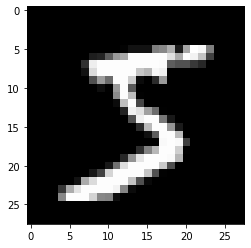

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print(label)


3


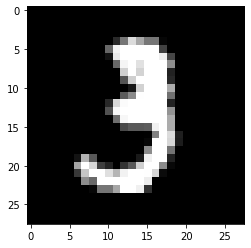

In [7]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print(label)

In [8]:
from torchvision.transforms import transforms

In [9]:
dataset = MNIST(root = 'data/', train = True, transform= transforms.ToTensor() )
test_dataset = MNIST(root = 'data/', train=False, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


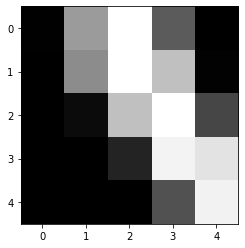

In [12]:
plt.imshow(img_tensor[0,10:15,10:15], cmap = 'gray')

In [13]:
import numpy as np

n = 60000
val_pct = 0.2

In [14]:
def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    
    idxs = np.random.permutation(n)
    
    return idxs[n_val:], idxs[:n_val]
    

In [15]:
train_indices, val_indices = split_indices(len(dataset), val_pct = 0.2)

print(len(train_indices))

48000


In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [17]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size, sampler= val_sampler)


In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
    

In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [21]:
for images, label in train_dl:
    output = model(images)
    break
print(output.shape)
print(output[:2].data)

torch.Size([100, 10])
tensor([[ 0.0696,  0.0423, -0.1530,  0.0283,  0.1580, -0.3363,  0.1697,  0.1832,
         -0.2791, -0.2834],
        [ 0.0900,  0.1821,  0.0683,  0.1240,  0.1279,  0.0514,  0.0891,  0.0396,
          0.0738,  0.0205]])


In [22]:
import torch.nn.functional as F

probs = F.softmax(output, dim = 1)
    

In [23]:
max_probs, preds = torch.max(probs, dim = 1)

print(preds)

tensor([7, 1, 4, 6, 1, 1, 2, 6, 6, 1, 1, 6, 0, 2, 1, 7, 4, 2, 7, 7, 2, 1, 4, 1,
        1, 1, 1, 0, 4, 6, 6, 0, 6, 0, 0, 6, 1, 1, 7, 4, 7, 6, 1, 1, 6, 4, 1, 1,
        6, 0, 7, 6, 1, 7, 6, 7, 0, 1, 7, 4, 4, 7, 6, 1, 7, 6, 1, 2, 1, 2, 7, 1,
        6, 6, 0, 6, 1, 0, 7, 6, 0, 1, 4, 0, 1, 4, 0, 1, 7, 7, 7, 6, 1, 1, 2, 4,
        1, 0, 0, 6])


In [24]:
label

tensor([9, 1, 8, 8, 5, 0, 4, 5, 0, 1, 8, 8, 7, 2, 2, 0, 1, 4, 9, 9, 4, 9, 2, 3,
        0, 3, 9, 4, 7, 1, 4, 7, 8, 3, 4, 8, 0, 9, 0, 9, 8, 2, 7, 3, 0, 7, 0, 0,
        6, 3, 7, 6, 1, 4, 6, 3, 8, 8, 4, 9, 1, 4, 6, 3, 4, 2, 8, 8, 0, 8, 4, 7,
        1, 6, 7, 0, 1, 4, 3, 0, 0, 2, 3, 8, 7, 7, 2, 5, 5, 4, 5, 6, 1, 0, 2, 6,
        8, 5, 3, 4])

In [25]:
import torch.nn.functional as F

In [26]:
loss_fn = F.cross_entropy

In [1]:
loss = loss_fn(output, label)
print(loss.dtype)

NameError: name 'loss_fn' is not defined

In [28]:
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        loss.backward()
        
        opt.step()
        
        opt.zero_grad()
    
    
    metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [30]:
def evaluate(model, loss_func, valid_dl, metric = None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, xb, yb, metric = metric) for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        
        
        avg_metric = np.sum(np.multiply(metrics, nums)) / total
        return avg_loss, total, avg_metric

In [31]:
def accuracy(output, labels):
    _, preds = torch.max(output, dim = 1)
    return torch.sum(preds == labels).item() / len(preds)

In [32]:
val_loss, totals, val_acc = evaluate(model, loss_fn, val_dl, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3128, Accuracy: 0.1343


In [33]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt, metric= metric)
        
            result = evaluate(model, loss_fn, valid_dl, metric= metric)
        
            val_loss, total, val_metric = result
        
    print('Epoch {}/{}, Loss: {}, {}:{:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [34]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
fit(5, model, F.cross_entropy, optimizer, train_dl, val_dl, metric = accuracy)

In [36]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    preds[0].item()

In [37]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap= 'gray')
print('Label : ', label, 'Pred: ', predict_image(img, model))


TypeError: 'Image' object is not subscriptable